# Numerical Methods 07-2: Romberg Behind!

## Gabriel M Steward

### April 2023

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

[Problem 2](#P1) (The Only One... The Sequel!)

<a id='P1'></a>

# Problem 2 \[Back to [top](#toc)\]
$$\label{P1}$$

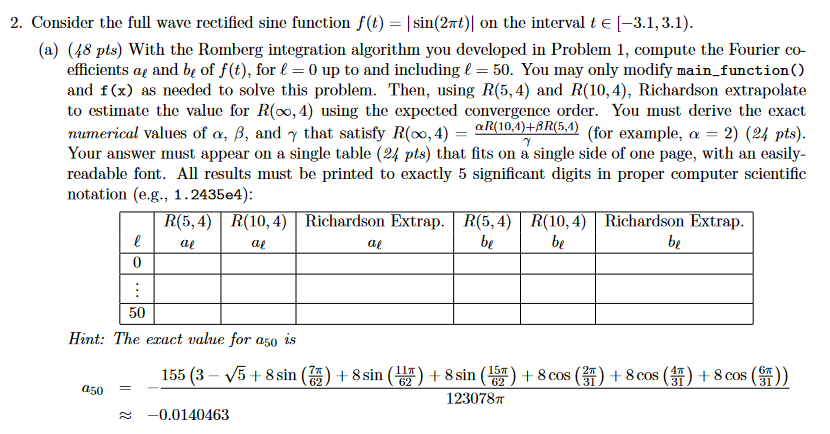

So before we begin, let's find the values of our coefficients for Richardson Extraplation. To do that, we find the exact answer, which we shall call R, and comapre it to our values and their unknown error term. 

$$ R = R(n,m) + K'(\Delta x_n)^{2m+2} $$

Which in our specific cases is...

$$ R = R(5,4) + K'(\Delta x_5)^{10} $$
$$ R = R(10,4) + K'(\Delta x_5\frac{1}{2^5})^{10} $$

The $1/2^5$ term comes in the fact that the n=10 is taking $2^5$ more steps than n=5. We have two equations, two unknowns.

$$ K' = \frac{R - R(5,4)}{(\Delta x_5)^{10}} $$

And then solve for what we want, R.

$$ R = R(10,4) + \frac{R - R(5,4)}{(\Delta x_5)^{6}}(\Delta x_5\frac{1}{2^5})^{10} $$
$$ \Rightarrow R = R(10,4) + (R - R(5,4))\frac{1}{2^{15}}$$
$$ \Rightarrow R(1-\frac{1}{2^{15}}) = R(10,4)  - R(5,4)\frac{1}{2^{15}}$$
$$ \Rightarrow R = \frac{R(10,4)  - R(5,4)\frac{1}{2^{6}}}{1-\frac{1}{2^{15}}}$$
$$ \Rightarrow R = \frac{R(10,4)  - R(5,4)\frac{1}{2^{6}}}{\frac{2^6-1}{2^{15}}}$$
$$ \Rightarrow R = \frac{2^15 R(10,4)  - R(5,4)}{2^15-1}$$
$$ \Rightarrow R = \frac{32768 R(10,4)  - R(5,4)}{32767}$$

Which means $\alpha = 1024, \beta = -1, \gamma = 1023$, which matches the 4,-1,3 pattern for the trapezoid rule. 

Anyway, so we'll use the estimation on one of them, the estimation of another, and then combine them together to get a new estimate. But what, exactly are we estimating? The fourier coefficients of $|sin(2\pi t)|$ over -3.1 to 3.1. Do note that we are not going from pi to pi, very specificlaly 3.1 instead. This means we're actually evaluating multiple different integrals.

$$ b_0 = 0$$
$$ a_0 = \frac{1}{L} \int^L_{-L} f(x) dx $$
$$ a_n = \frac{1}{L} \int^L_{-L} f(x) cos\frac{n\pi x}{L} dx $$
$$ b_n = \frac{1}{L} \int^L_{-L} f(x) sin\frac{n\pi x}{L} dx $$

In our specific case we have some simplificaitons we can make. L = 3.1, and the function itself is $|sin(2\pi t)|$ 

$$ b_0 = 0$$
$$ a_0 = \frac{1}{3.1} \int^{3.1}_{-3.1} |sin(2\pi t)| dt $$
$$ a_n = \frac{1}{3.1} \int^{3.1}_{-3.1} |sin(2\pi t)| cos\frac{n\pi t}{3.1} dt $$
$$ b_n = \frac{1}{3.1} \int^{3.1}_{-3.1} |sin(2\pi t)| sin\frac{n\pi t}{3.1} dt $$

All this effectively means that, if we want to print things in sequence, `f(x)` is going to need a way to check which coefficient it needs to evaluate. Which will be done through a global variable rahter than a passed argument since we aren't permitted to alter the other funcitons.

The code can be found in full in the coding part of this assignment. Since we are explicitly asked for the full table, it is reproduced here in full.




```
l        R_5_4 a_l       R_10_4 a_l      Rich a_l        R_5_4 b_l       R_10_4 b_l      Rich b_l
0        1.2369e+00      1.2518e+00      1.2518e+00      0.0000e+00      0.0000e+00      0.0000e+00
1        3.7718e-02      2.1609e-02      2.1609e-02      1.6091e-17      8.7996e-18      8.7994e-18
2        -5.5643e-02     -2.2042e-02     -2.2041e-02     -2.4327e-16     -7.3406e-18     -7.3334e-18
3        1.0037e-01      2.2799e-02      2.2797e-02      4.7904e-17      -3.6644e-17     -3.6646e-17
4        1.2528e-01      -2.3840e-02     -2.3845e-02     -8.4153e-17     7.9564e-18      7.9592e-18
5        -7.2447e-02     2.5452e-02      2.5455e-02      1.9018e-17      5.3594e-17      5.3595e-17
6        1.6174e-02      -2.7847e-02     -2.7849e-02     7.6090e-16      -2.0598e-17     -2.0622e-17
7        -7.7042e-02     3.1191e-02      3.1195e-02      -7.4590e-16     -4.6327e-17     -4.6306e-17
8        1.6059e-02      -3.6376e-02     -3.6378e-02     2.0464e-16      1.6156e-17      1.6151e-17
9        5.7151e-02      4.4767e-02      4.4766e-02      -1.4831e-16     -4.1435e-17     -4.1432e-17
10       -5.1770e-02     -6.0240e-02     -6.0240e-02     2.4962e-16      -1.9032e-17     -1.9040e-17
11       8.5088e-02      9.8276e-02      9.8276e-02      -8.4347e-17     4.1975e-17      4.1978e-17
12       -3.2157e-01     -3.2755e-01     -3.2755e-01     1.0798e-15      -1.6742e-18     -1.7072e-18
13       -2.2361e-01     -2.0792e-01     -2.0792e-01     4.8861e-16      1.8496e-17      1.8482e-17
14       8.6630e-02      7.4174e-02      7.4173e-02      -1.0074e-15     -6.4157e-17     -6.4128e-17
15       -8.6478e-02     -4.3352e-02     -4.3350e-02     5.4326e-16      -3.7575e-17     -3.7592e-17
16       -5.0869e-01     2.9709e-02      2.9726e-02      1.8157e-16      -6.8090e-17     -6.8098e-17
17       -8.6478e-02     -2.1853e-02     -2.1851e-02     6.2037e-16      8.3316e-17      8.3300e-17
18       8.6630e-02      1.6668e-02      1.6666e-02      -9.4516e-16     7.5630e-18      7.5921e-18
19       -2.2361e-01     -1.2987e-02     -1.2980e-02     6.9864e-16      5.1170e-17      5.1151e-17
20       -3.2157e-01     9.9376e-03      9.9477e-03      4.1196e-16      8.3327e-17      8.3317e-17
21       8.5088e-02      -7.2608e-03     -7.2636e-03     -5.5455e-16     2.2234e-17      2.2251e-17
22       -5.1770e-02     4.4383e-03      4.4400e-03      -1.1643e-15     -4.0451e-17     -4.0417e-17
23       5.7151e-02      -1.7521e-04     -1.7696e-04     1.9527e-16      -6.5838e-17     -6.5846e-17
24       1.6059e-02      -1.1755e-02     -1.1756e-02     -1.0391e-15     -1.0841e-16     -1.0838e-16
25       -7.7042e-02     -8.6776e-02     -8.6776e-02     6.0612e-16      5.0303e-17      5.0286e-17
26       1.6174e-02      2.0008e-02      2.0008e-02      -8.4342e-17     -9.3800e-18     -9.3777e-18
27       -7.2447e-02     -1.3519e-02     -1.3517e-02     -7.8858e-16     7.0376e-17      7.0402e-17
28       1.2528e-01      1.0904e-02      1.0901e-02      -3.2337e-16     -8.1434e-17     -8.1426e-17
29       1.0037e-01      -9.3109e-03     -9.3142e-03     -8.4590e-16     -5.5674e-18     -5.5418e-18
30       -5.5643e-02     8.3118e-03      8.3138e-03      1.9227e-15      3.7483e-18      3.6897e-18
31       3.7718e-02      -7.7156e-03     -7.7170e-03     -1.1557e-16     2.2664e-16      2.2665e-16
32       1.2369e+00      7.2514e-03      7.2139e-03      3.0111e-16      1.6214e-16      1.6214e-16
33       3.7718e-02      -7.1264e-03     -7.1277e-03     -3.3087e-16     1.1520e-16      1.1521e-16
34       -5.5643e-02     7.2809e-03      7.2828e-03      1.1516e-15      7.6319e-17      7.6287e-17
35       1.0037e-01      -7.8733e-03     -7.8766e-03     -1.4474e-16     -2.8020e-18     -2.7977e-18
36       1.2528e-01      1.0147e-02      1.0143e-02      -2.3502e-16     -1.2794e-16     -1.2793e-16
37       -7.2447e-02     -3.8258e-02     -3.8257e-02     -7.2092e-16     1.6435e-16      1.6438e-16
38       1.6174e-02      -4.4917e-03     -4.4923e-03     1.7935e-15      -4.1972e-19     -4.7446e-19
39       -7.7042e-02     -6.6962e-05     -6.4613e-05     -2.7839e-16     -7.9938e-17     -7.9932e-17
40       1.6059e-02      1.2752e-03      1.2748e-03      -2.3751e-16     -2.9609e-16     -2.9609e-16
41       5.7151e-02      -1.7019e-03     -1.7037e-03     -1.2374e-15     2.4626e-16      2.4631e-16
42       -5.1770e-02     2.0332e-03      2.0348e-03      -6.0648e-16     -2.2285e-16     -2.2284e-16
43       8.5088e-02      -2.3135e-03     -2.3162e-03     -1.0683e-15     -3.3838e-17     -3.3806e-17
44       -3.2157e-01     2.4796e-03      2.4895e-03      1.3463e-15      -1.2654e-16     -1.2659e-16
45       -2.2361e-01     -2.8065e-03     -2.7998e-03     4.3208e-16      -2.9732e-16     -2.9734e-16
46       8.6630e-02      3.1659e-03      3.1634e-03      -1.6843e-15     2.2853e-17      2.2905e-17
47       -8.6478e-02     -3.7318e-03     -3.7293e-03     1.4123e-15      -3.0940e-16     -3.0945e-16
48       -5.0869e-01     5.1554e-03      5.1711e-03      2.5958e-16      7.2886e-17      7.2881e-17
49       -8.6478e-02     -1.1488e-02     -1.1485e-02     4.5745e-16      -1.0398e-16     -1.0400e-16
50       8.6630e-02      -1.4052e-02     -1.4055e-02     -2.4381e-15     -3.0618e-16     -3.0611e-16
```

Some thigns we can tell right away: all of the $b_n$ values are of 1e-16 or below, so they're all nonexistent. Which, of cousre they are, the funciton we're given is an even function. The $a_{50}$ term is even really close to the value we were given, which is great!

However, we note something--that the Richardson Extrapolation actually gives a *worse* estimate than R(10,4) does. Does this mean our extrapolation is coded incorrectly? Well, no. Note that our estimation from R(10,4) is more negative than the actual value, and by nature richardson extrapolation is *subtracting* a value. Now if R(5,4) was also negative, this wouldn't be a problem, but since R(5,4) is *positive*, we can only get *more negative* in the final result, which will take us further away. We suspect this is due to *undersampling error*. If we look at the actual shape of the function we're integrating:

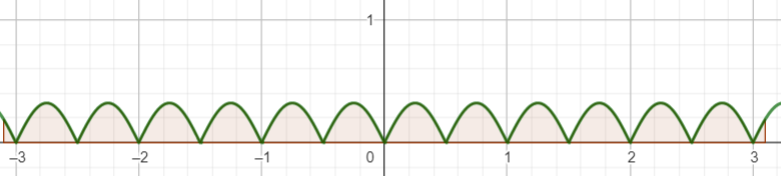

(Plot made with GeoGebra for illustration purposes). 

Now, how many points does n=5 sample? 32. Nyquist sampling here would be around 25 points, and this is for the unmodified function, not what it looks like when paired with, say, the Fourier terms, which will have ever-increasing frequency. This explains why the two almost agree in the low-l numbers, while they basically never agree at high-l numbers.

n=10, for the record, samples 1024 points, and l=50 introduces a term with higher frequency. Every factor of 2 doubles the points needed for nyquist sampling, but we already have order 2. so while 50 is somewhat close to 64, we reduce the power to 32. This is $2^5$. This could conceivably increase the points to 25 times 5 which is 125, a lot more points than R(5,4) is actually sampling. This, admittedly, is just an estimate, but it could explain why the fourth digit is unreliable. Regardless, at the end, R(5,4) might as well be spitting out nonsense, and thus we are understimating the error it produces in Richardson extrapolation, so the Richardson result is worse than it otherwise would be.

The one place where it would definitely be better, the first step, has so little difference between the two that Richardson extrapolation just says that R(10,4) is right. 

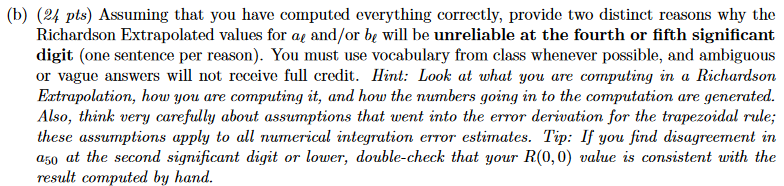

We discussed one of these previously in part a), the undersampling error on R(5,4) is pushing us beyond the expected error for that method; in our Richardson Extrapolation we are giving R(10,4) on the order of 1e5 more weight than R(5,4) so a very wrong error on R(5,4) would shift the result around the fifth digit. 

The other one has to do with the assumption in the derivation of the trapezoid rule error, specifically that f is a smooth funciton so that f'' was well-defined--as we can see from the image in part a) the function we are working on clearly is *not* that given all the downward spikes.

(Footnote: it's bad enough GeoGebra doesn't know how to plot the second derivative properly! Wow!)

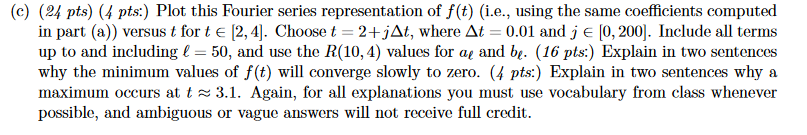

We only use the values of $a_n$ since $b_n$ clearly should be zero in every case, due to this being an even function. 

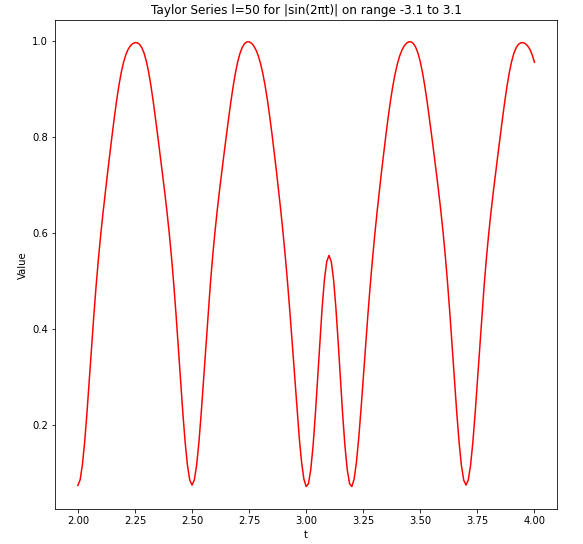

And that looks about right, compared to what we plotted directly earlier.

The minimum values of f(t) converge slowly to zero due to the fact that those points are *spikes* and thus require high frequencies in cosines to actually fill them. Sines and cosines, being very smooth, have a hard time filing spikes--and since these spikes are not discontinuities, they do not exhibit Gibbs' Phenomena and there is no overshoot. 

The 3.1 maximum occurs because that is the edge of evaluation we were given; from -3.1 to 3.1. The function is symmetric so both sides more or less match, but both sides reach a peak there, so it has to be a maxima. 